In [1]:
import string

import cartopy.crs as ccrs
import faceted
import numpy as np

import noise_floor
import plotting
import utils

from constants import CLIMATES

In [2]:
plotting.configure_style()

In [3]:
TITLE_TEMPLATE = """{name}
Global {metric_name} = {g:0.2f}
Land {metric_name} = {l:0.2f}
Ocean/sea-ice {metric_name} = {n:0.2f}"""

NO_NAME_TITLE_TEMPLATE = """Global {metric_name} = {g:0.2f}
Land {metric_name} = {l:0.2f}
Ocean/sea-ice {metric_name} = {n:0.2f}"""

REFERENCE = "SHiELD-SOM-C96"
BASELINE = "SHiELD-SOM-C24-tuned-cdmbgwd"
ACE2_SOM = "ACE2-SOM-multi-climate-RS3"
ONE_DEGREE_MODELS = [REFERENCE, ACE2_SOM]
FOUR_DEGREE_MODELS = [REFERENCE, BASELINE, ACE2_SOM]
VARIABLES = ["surface_temperature", "PRATEsfc"]

regridder = utils.get_regridder()
catalog = utils.open_catalog()
one_degree_cases = catalog[
    catalog["model"].isin(ONE_DEGREE_MODELS) & catalog["forcing"].isin(CLIMATES)
]
four_degree_cases = catalog[
    catalog["model"].isin(FOUR_DEGREE_MODELS) & catalog["forcing"].isin(CLIMATES)
]

In [4]:
def compute_climate_change(ds):
    return ds.sel(climate=["2xCO2", "3xCO2", "4xCO2"]) - ds.sel(climate="1xCO2")

In [5]:
one_degree = utils.load_time_mean_spatial_patterns(one_degree_cases, VARIABLES)
four_degree = utils.load_time_mean_spatial_patterns(
    four_degree_cases, VARIABLES, target_resolution=4, regridder=regridder
)

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

/home/spencerc/ace2-som-paper/notebooks/utils.py:202: FutureWarning: the `pandas.MultiIndex` object(s) passed as 'case' coordinate(s) or data variable(s) will no longer be implicitly promoted and wrapped into multiple indexed coordinates in the future (i.e., one coordinate for each multi-index level + one dimension coordinate). If you want to keep this behavior, you need to first wrap it explicitly using `mindex_coords = xarray.Coordinates.from_pandas_multiindex(mindex_obj, 'dim')` and pass it as coordinates, e.g., `xarray.Dataset(coords=mindex_coords)`, `dataset.assign_coords(mindex_coords)` or `dataarray.assign_coords(mindex_coords)`.
  result = combined.assign_coords(case=index).unstack("case")


Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

/home/spencerc/ace2-som-paper/notebooks/utils.py:202: FutureWarning: the `pandas.MultiIndex` object(s) passed as 'case' coordinate(s) or data variable(s) will no longer be implicitly promoted and wrapped into multiple indexed coordinates in the future (i.e., one coordinate for each multi-index level + one dimension coordinate). If you want to keep this behavior, you need to first wrap it explicitly using `mindex_coords = xarray.Coordinates.from_pandas_multiindex(mindex_obj, 'dim')` and pass it as coordinates, e.g., `xarray.Dataset(coords=mindex_coords)`, `dataset.assign_coords(mindex_coords)` or `dataarray.assign_coords(mindex_coords)`.
  result = combined.assign_coords(case=index).unstack("case")


In [6]:
one_degree_ensemble_mean = one_degree.mean("initial_condition")
four_degree_ensemble_mean = four_degree.mean("initial_condition")

one_degree_climate_change = compute_climate_change(one_degree_ensemble_mean)
four_degree_climate_change = compute_climate_change(four_degree_ensemble_mean)

In [7]:
one_degree_weights = utils.get_weights("gaussian_grid_180_by_360")
four_degree_weights = utils.get_weights("gaussian_grid_45_by_90")

In [8]:
one_degree_pattern_error = utils.compute_bias(
    one_degree_climate_change, "model", REFERENCE
)
four_degree_pattern_error = utils.compute_bias(
    four_degree_climate_change, "model", REFERENCE
)

mean_one_degree_climate_change = one_degree_climate_change.weighted(
    one_degree_weights
).mean(["lon", "lat"])
mean_four_degree_climate_change = four_degree_climate_change.weighted(
    four_degree_weights
).mean(["lon", "lat"])

one_degree_pattern_rmse = np.sqrt(
    (one_degree_pattern_error**2).weighted(one_degree_weights).mean(["lon", "lat"])
)
four_degree_pattern_rmse = np.sqrt(
    (four_degree_pattern_error**2).weighted(four_degree_weights).mean(["lon", "lat"])
)

In [9]:
percent_change = (
    four_degree_pattern_rmse.sel(model=ACE2_SOM)
    - four_degree_pattern_rmse.sel(model=BASELINE)
) / four_degree_pattern_rmse.sel(model=BASELINE)

In [10]:
100 * percent_change.sel(region="global").surface_temperature

<xarray.DataArray 'surface_temperature' (climate: 3)> Size: 24B
array([ -6.92951858, -23.93331749, -25.1349682 ])
Coordinates:
  * climate  (climate) object 24B '2xCO2' '3xCO2' '4xCO2'
    region   <U6 24B 'global'
    model    <U28 112B 'SHiELD-SOM-C24-tuned-cdmbgwd'

In [11]:
_, four_degree_reference_stddevs = noise_floor.compute_regridded_noise_floor(
    regridder, CLIMATES
)

four_degree_noise_floor_stddevs = noise_floor.extrapolate(
    four_degree_reference_stddevs, 50
)
four_degree_noise_floor_stddevs = utils.scale_precipitation(
    four_degree_noise_floor_stddevs
)

four_degree_climate_change_noise_floor_stddevs = (
    np.sqrt(2) * four_degree_noise_floor_stddevs
)

In [12]:
CLIMATE_LABEL = {
    "1xCO2": "1xCO$_2$",
    "2xCO2": "2xCO$_2$",
    "3xCO2": "3xCO$_2$",
    "4xCO2": "4xCO$_2$",
}


def get_title(
    metric, variable, climate, model, metric_name, model_name, include_name=True
):
    sel_kwargs = {"model": model, "climate": climate}
    g = metric.sel(region="global", **sel_kwargs)[variable].item()
    l = metric.sel(region="land", **sel_kwargs)[variable].item()
    n = metric.sel(region="non-land", **sel_kwargs)[variable].item()
    if include_name:
        return TITLE_TEMPLATE.format(
            name=f"{model_name} {CLIMATE_LABEL[climate]}",
            metric_name=metric_name,
            g=g,
            l=l,
            n=n,
        )
    else:
        return NO_NAME_TITLE_TEMPLATE.format(metric_name=metric_name, g=g, l=l, n=n)

In [13]:
def transposed_climate_change_plot_with_bar_chart(
    one_degree_climate_change,
    four_degree_climate_change,
    one_degree_mean_climate_change,
    four_degree_mean_climate_change,
    one_degree_pattern_error,
    four_degree_pattern_error,
    four_degree_pattern_rmse,
    four_degree_pattern_error_stddev,
    model,
    climate,
    variable,
    vmin,
    vmax,
    vmin_error,
    vmax_error,
    colorbar_label,
    units,
    filename,
):
    fig, axes, (cax1, cax2) = faceted.faceted(
        3,
        2,
        width=5.5,
        aspect=0.5,
        internal_pad=(0.3, 0.70),
        cbar_mode="edge",
        cbar_location="bottom",
        cbar_pad=0.15,
        top_pad=0.5,
        right_pad=0.1,
        left_pad=0.3,
        bottom_pad=0.7,
        axes_kwargs={"projection": ccrs.Robinson()},
    )
    ax1, ax2, ax3, ax4, ax5, ax6 = axes

    # Remove projection from ax2
    position = ax2.get_position(original=True)
    ax2.set_visible(False)
    ax2 = fig.add_axes(position)

    cmap = "RdBu_r"
    plot_kwargs = {
        "transform": ccrs.PlateCarree(),
        "vmin": vmin,
        "vmax": vmax,
        "cmap": cmap,
        "add_colorbar": False,
    }

    p1 = one_degree_climate_change.sel(model=REFERENCE, climate=climate)[variable].plot(
        ax=ax1, **plot_kwargs
    )
    p1 = one_degree_climate_change.sel(model=model, climate=climate)[variable].plot(
        ax=ax3, **plot_kwargs
    )
    p1 = four_degree_climate_change.sel(model=BASELINE, climate=climate)[variable].plot(
        ax=ax5, **plot_kwargs
    )

    ax1.set_title(
        get_title(
            one_degree_mean_climate_change,
            variable,
            climate,
            REFERENCE,
            "mean",
            "100 km SHiELD-SOM",
            include_name=False,
        )
    )
    ax3.set_title(
        get_title(
            one_degree_mean_climate_change,
            variable,
            climate,
            model,
            "mean",
            "ACE2-SOM",
            include_name=False,
        )
    )
    ax5.set_title(
        get_title(
            four_degree_mean_climate_change,
            variable,
            climate,
            BASELINE,
            "mean",
            "400 km SHiELD-SOM",
            include_name=False,
        )
    )

    vmin, vmax = -3, 3
    cmap = "RdBu_r"
    plot_kwargs = {
        "transform": ccrs.PlateCarree(),
        "vmin": vmin_error,
        "vmax": vmax_error,
        "cmap": cmap,
        "add_colorbar": False,
    }
    p2 = one_degree_pattern_error.sel(model=model, climate=climate)[variable].plot(
        ax=ax4, **plot_kwargs
    )
    p2 = four_degree_pattern_error.sel(model=BASELINE, climate=climate)[variable].plot(
        ax=ax6, **plot_kwargs
    )

    ax4.set_title(
        get_title(
            four_degree_pattern_rmse,
            variable,
            climate,
            model,
            "4° RMS",
            "ACE2-SOM",
            include_name=False,
        )
    )
    ax6.set_title(
        get_title(
            four_degree_pattern_rmse,
            variable,
            climate,
            BASELINE,
            "4° RMS",
            "400 km SHiELD-SOM",
            include_name=False,
        )
    )

    for ax in axes:
        ax.coastlines()

    fig.colorbar(
        p1,
        cax=cax1,
        orientation="horizontal",
        label=f"{colorbar_label} change\n({CLIMATE_LABEL[climate]} minus 1xCO$_2$)\n[{units}]",
    )
    fig.colorbar(
        p2,
        cax=cax2,
        orientation="horizontal",
        label=f"Error\n(model minus C96 SHiELD-SOM)\n[{units}]",
    )

    ax1.annotate(
        "C96 SHiELD-SOM",
        xy=(0, 0.5),
        xytext=(-10, 0),
        xycoords="axes fraction",
        textcoords="offset points",
        ha="right",
        va="center",
        rotation=90,
    )
    ax3.annotate(
        "ACE2-SOM",
        xy=(0, 0.5),
        xytext=(-10, 0),
        xycoords="axes fraction",
        textcoords="offset points",
        ha="right",
        va="center",
        rotation=90,
    )
    ax5.annotate(
        "C24 SHiELD-SOM",
        xy=(0, 0.5),
        xytext=(-10, 0),
        xycoords="axes fraction",
        textcoords="offset points",
        ha="right",
        va="center",
        rotation=90,
    )

    colors = ["C1", "C0"]
    labels = ["SHiELD-SOM-C24", "ACE2-SOM"]
    yerr = 2 * four_degree_pattern_error_stddev[variable].item()
    (
        four_degree_pattern_rmse[variable]
        .sel(region="global", model=[BASELINE, model])
        .drop_vars(["region"])
        .to_dataframe()
        .unstack(level=-2)
        .plot.bar(
            ax=ax2,
            color=colors,
            label="_no_legend_",
            legend=False,
            yerr=yerr,
            capsize=3,
        )
    )

    ax2.set_xticklabels(["2xCO$_2$", "3xCO$_2$", "4xCO$_2$"], rotation=0)
    ax2.set_xlabel("")
    ax2.set_title(f"Global climate change 4° RMSE\n(climate minus 1xCO$_2$) [{units}]")
    ax2.legend(labels, ncol=2, fontsize=6)
    ax2.set_ylim(0, 1)

    for ax, label in zip((ax1, ax2, ax3, ax4, ax5, ax6), string.ascii_lowercase):
        ax.annotate(
            f"({label})",
            xy=(0, 1),
            xytext=(2, -2),
            va="top",
            xycoords="axes fraction",
            textcoords="offset points",
        )

    fig.savefig(f"figures/{filename}.pdf")
    fig.savefig(f"figures/{filename}.png", dpi=200)

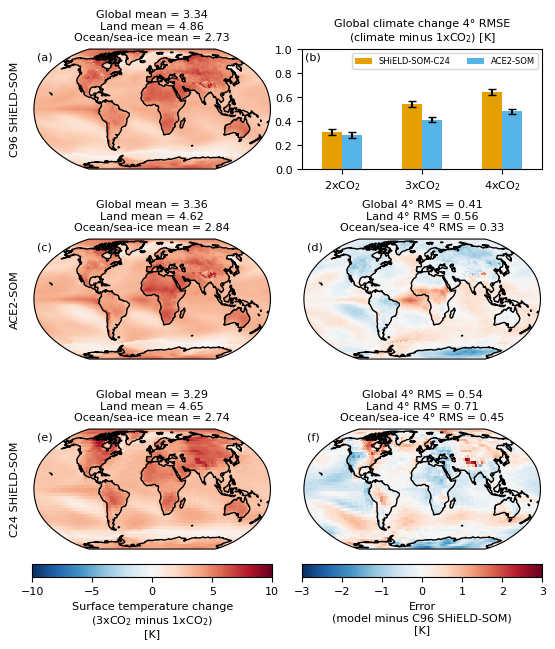

In [14]:
transposed_climate_change_plot_with_bar_chart(
    one_degree_climate_change,
    four_degree_climate_change,
    mean_one_degree_climate_change,
    mean_four_degree_climate_change,
    one_degree_pattern_error,
    four_degree_pattern_error,
    four_degree_pattern_rmse,
    four_degree_climate_change_noise_floor_stddevs,
    ACE2_SOM,
    "3xCO2",
    "surface_temperature",
    -10,
    10,
    -3,
    3,
    "Surface temperature",
    "K",
    "figure-03"
)

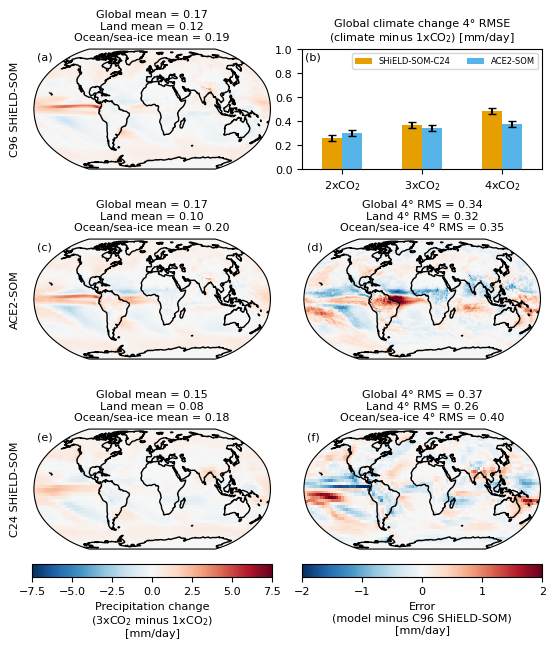

In [15]:
transposed_climate_change_plot_with_bar_chart(
    one_degree_climate_change,
    four_degree_climate_change,
    mean_one_degree_climate_change,
    mean_four_degree_climate_change,
    one_degree_pattern_error,
    four_degree_pattern_error,
    four_degree_pattern_rmse,
    four_degree_climate_change_noise_floor_stddevs,
    ACE2_SOM,
    "3xCO2",
    "PRATEsfc",
    -7.5,
    7.5,
    -2,
    2,
    "Precipitation",
    "mm/day",
    "figure-05"
)